In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import csv
import datetime

GRACE data from 2002 Apr 1:

In [2]:
grace_ds = xr.open_dataset("GRACEDADM_CLSM0125US_7D.A20020401.030.nc4")

GRACE data has various drought variables:
* groundwater storage percentile
* root zone soil moisture percentile
* surface soil moisture percentile

In [3]:
grace_ds

<xarray.Dataset>
Dimensions:     (lat: 224, lon: 464, time: 1)
Coordinates:
  * lat         (lat) float32 25.06 25.19 25.31 25.44 ... 52.69 52.81 52.94
  * lon         (lon) float32 -124.9 -124.8 -124.7 ... -67.31 -67.19 -67.06
  * time        (time) datetime64[ns] 2002-04-01
Data variables:
    gws_inst    (time, lat, lon) float32 ...
    rtzsm_inst  (time, lat, lon) float32 ...
    sfsm_inst   (time, lat, lon) float32 ...
Attributes: (12/15)
    missing_value:          -999.0
    title:                  GRACE Data Assimilation Drought Indicator
    version:                030
    input:                  CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_20
    institution:            NASA GSFC HSL
    source:                 Catchment
    ...                     ...
    comment:                website: http://drought.unl.edu/MonitoringTools/N...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  25.0625
    SOUTH_WEST_CORNER_LON:  -124.9375
    DX:                     0.125
    DY:                     0.125

In [11]:
latitude_north = 43
latitude_south = 26
longitude_west = -124
longitude_east = -97

/var/folders/s0/p4kwg0r17s59t6f4g9btngzw0000gn/T/ipykernel_43827/1674889230.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


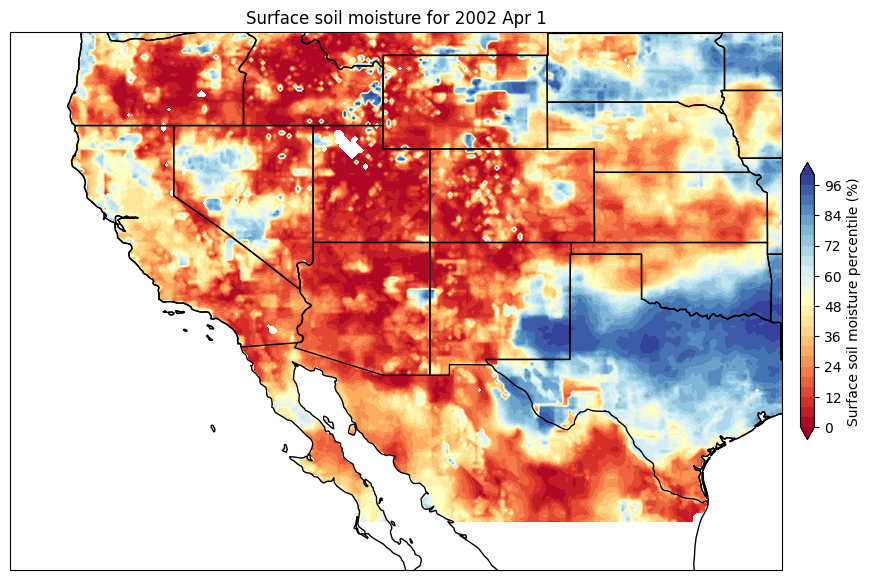

In [18]:
projection=ccrs.PlateCarree(central_longitude=0)
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.RdYlBu
levels = np.linspace(0, 100, 26)

c=ax.contourf(grace_ds.lon, grace_ds.lat, grace_ds.sfsm_inst[0], cmap=cmap, extend='both', levels=levels)

ax.set_extent([longitude_west-3, longitude_east+3, latitude_south-3, latitude_north+3], crs=ccrs.PlateCarree())

clb = plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
clb.set_label('Surface soil moisture percentile (%)')

ax.set_title("Surface soil moisture for 2002 Apr 1" )
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(cfeature.STATES)

fig.show()

In [ ]:
with open('Dust_LatLon_SecondPass_Bill.xlsx - Data LatLon.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        print(', '.join(row))